In [52]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Exploration des données

In [69]:
df = pd.read_csv("data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

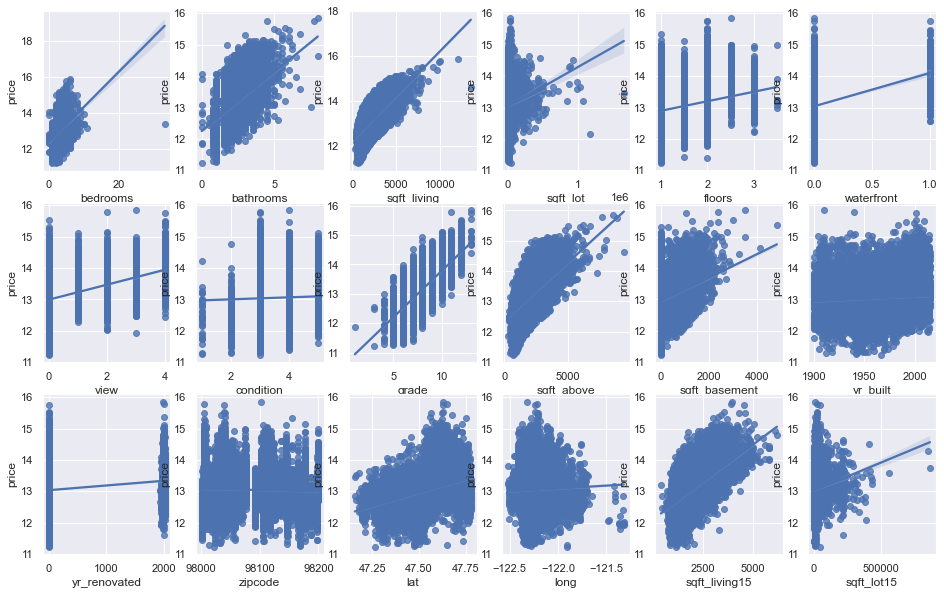

In [71]:
columns = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront",
"view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated",
"zipcode","lat","long","sqft_living15","sqft_lot15"
]

fig, axes = plt.subplots(3, 6,figsize=(16,10))
for i in range(len(columns)):
    if i < 6:
        sns.regplot(ax=axes[0,i], x=df[columns[i]], y=np.log(df["price"]))
    elif i < 12:
        sns.regplot(ax=axes[1,i-6], x=df[columns[i]], y=np.log(df["price"]))
    else:
        sns.regplot(ax=axes[2,i-12], x=df[columns[i]], y=np.log(df["price"]))

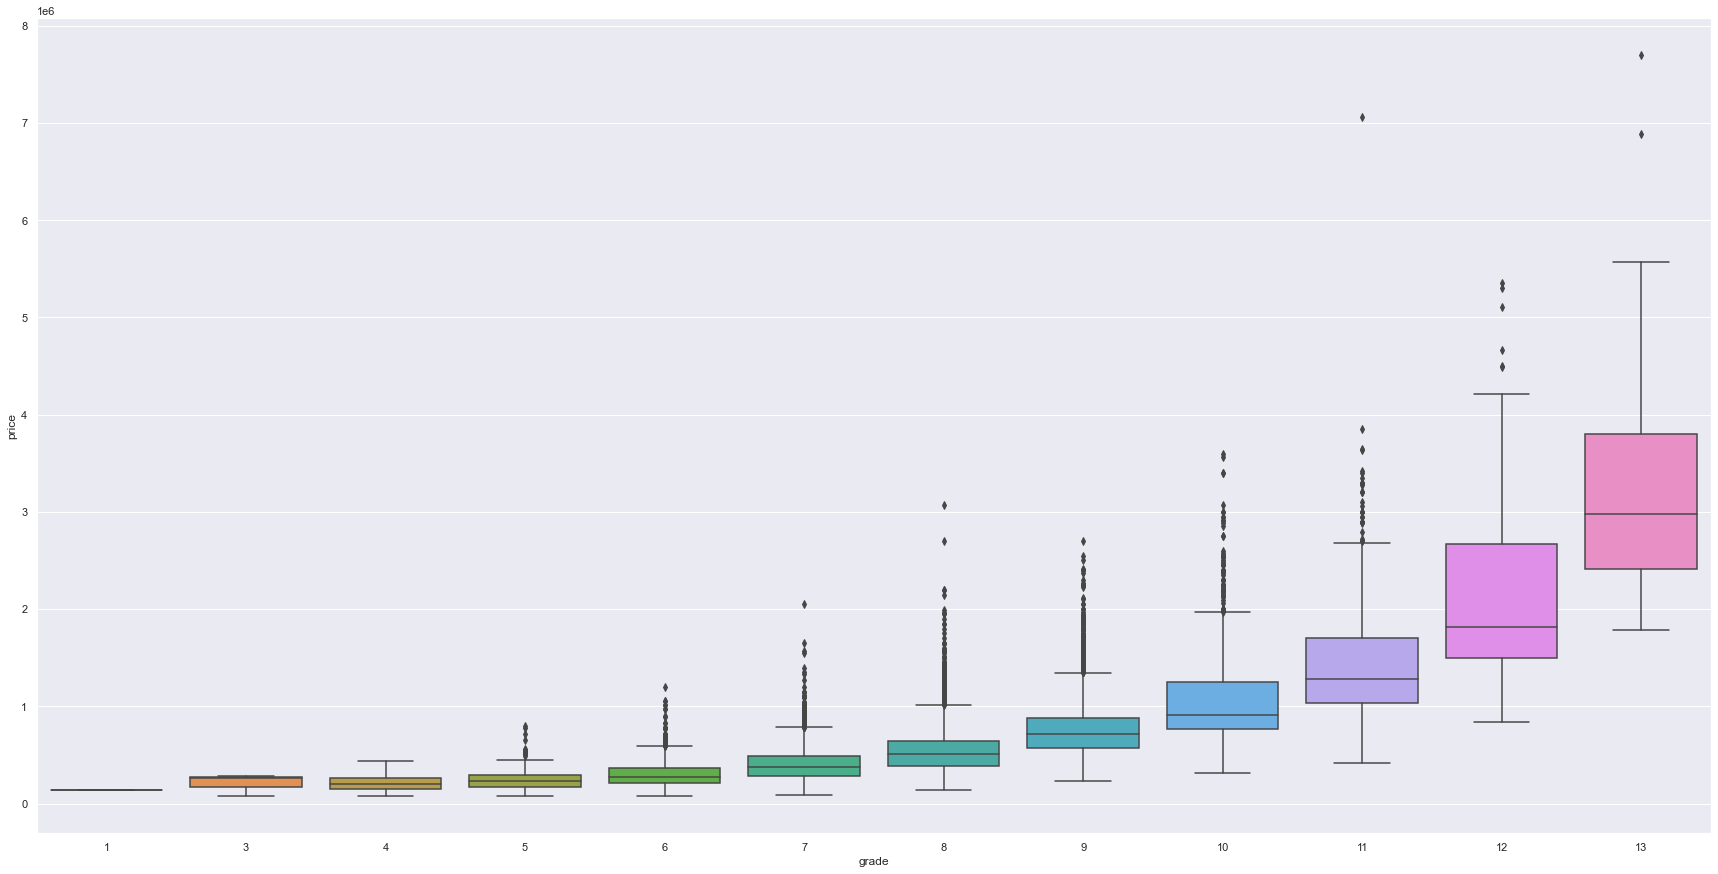

In [56]:
sns.boxplot(data=df,x="grade",y="price")
sns.set(rc={'figure.figsize':(6,5)})

C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_9972/427729340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]
C:\Users\APPREN~1\AppData\Local\Temp/ipykernel_9972/427729340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation'][df['renovation'] < 0] = 0


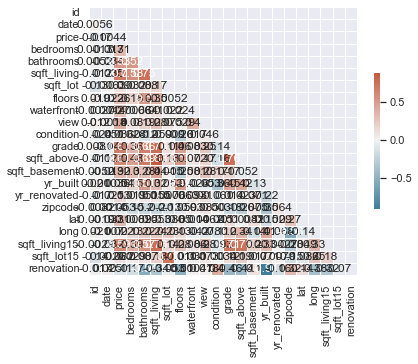

In [57]:
df["date"] = pd.to_datetime(df["date"])
df["renovation"] = df["date"].dt.year - df['yr_built']
df['renovation'][df['yr_renovated'] != 0] = df["date"].dt.year - df["yr_renovated"]
df['renovation'][df['renovation'] < 0] = 0
df["date"] = (df["date"] - df["date"].min()).dt.days

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set(rc={'figure.figsize':(30,15)})

Price => trés forte corrélation avec : sqft_living15, lat, sqft_basement, sqft_above,grade, view, sqft_living, bathrooms et bedrooms  
sqft_living = sqft_above+sqft_basement  
sqft_living de type polynomial

sqft_living15 fortement corrélé avec sqft_living, grade et sqft_above
sqft_lot15 fortement corrélé avec sqft_lot

# Préparation des données

In [58]:
df["ln_price"] = np.log(df["price"])
df = df[df["bedrooms"] <= 20]

In [59]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovation,ln_price
count,2.161200e+04,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,...,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,4.580402e+09,180.198917,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,0.007542,0.234314,...,291.495697,1971.006247,84.406163,98077.938645,47.560047,-122.213891,1986.582871,12768.828984,40.936563,13.047802
std,2.876594e+09,113.047367,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.086519,0.766334,...,442.580931,29.373636,401.688123,53.505993,0.138564,0.140829,685.392610,27304.756179,28.812567,0.526692
min,1.000102e+06,0.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,11.225243
25%,2.123049e+09,81.000000,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000,15.000000,12.681802
50%,3.904930e+09,167.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,37.000000,13.017003
75%,7.308900e+09,291.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.250000,60.000000,13.377006
max,9.900000e+09,390.000000,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,15.856731


In [60]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'renovation'}>,
        <AxesSubplot:title={'center':'sqft_living_1'}>,
        <AxesSubplot:title={'center':'sqft_living_2'}>],
       [<AxesSubplot:title={'center':'bedrooms_1'}>,
        <AxesSubplot:title={'center':'bedrooms_2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

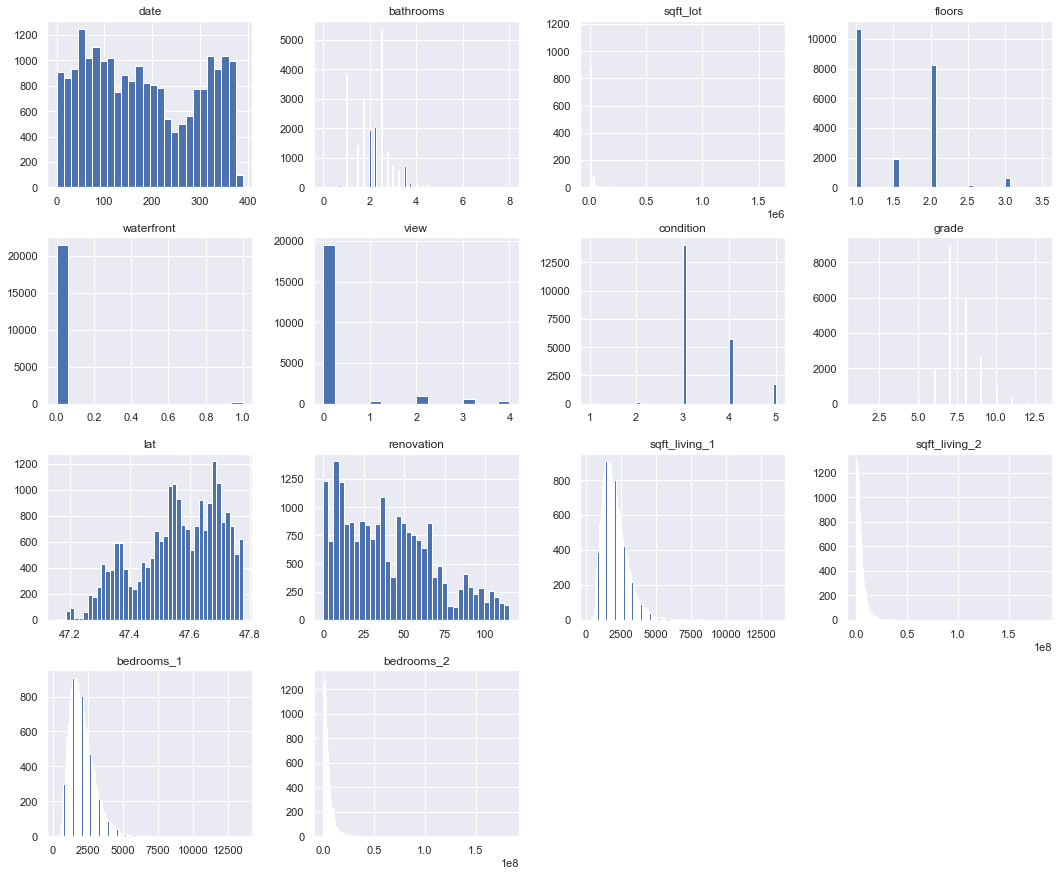

In [61]:
y = df["ln_price"]
pf = PolynomialFeatures()
scaler = StandardScaler()
sqft_living_encode = pf.fit_transform(np.array(df["sqft_living"]).reshape(-1,1))
bedrooms_encode = pf.fit_transform(np.array(df["sqft_living"]).reshape(-1,1))
df["0"] = sqft_living_encode[:,0]
df["sqft_living_1"] = sqft_living_encode[:,1]
df["sqft_living_2"] = sqft_living_encode[:,2]
df["bedrooms_1"] = bedrooms_encode[:,1]
df["bedrooms_2"] = bedrooms_encode[:,2]
X = df.drop(["price","id","sqft_lot15","sqft_living15","sqft_basement","sqft_above","long",
         "zipcode","ln_price", "yr_built","yr_renovated","0","bedrooms","sqft_living"], axis=1)
X.hist(figsize=(18,15), bins="auto")

In [62]:
selector = RFECV(LinearRegression(), step=1, min_features_to_select=2, cv=5)
selector.fit(X, y)
selector.cv_results_

{'mean_test_score': array([0.22953364, 0.64733575, 0.66552264, 0.68667081, 0.70398355,
        0.70312938, 0.72143695, 0.7327519 , 0.75152746, 0.75152746,
        0.75185832, 0.75488316, 0.75488316]),
 'std_test_score': array([0.02346755, 0.00663681, 0.00726616, 0.00740596, 0.0081082 ,
        0.00778226, 0.00760751, 0.00757186, 0.00864102, 0.00864102,
        0.00829656, 0.00760411, 0.00760411]),
 'split0_test_score': array([0.25542762, 0.64919892, 0.67032801, 0.69108921, 0.70897318,
        0.70850551, 0.72906609, 0.72976561, 0.75450328, 0.75450328,
        0.75578425, 0.75800846, 0.75800846]),
 'split1_test_score': array([0.23883426, 0.64529767, 0.66174472, 0.68070588, 0.69879447,
        0.69826557, 0.71851096, 0.74568529, 0.74717303, 0.74717303,
        0.74773082, 0.74831339, 0.74831339]),
 'split2_test_score': array([0.23162609, 0.6356074 , 0.65300433, 0.67519389, 0.6905784 ,
        0.69038863, 0.70858732, 0.73547121, 0.73823349, 0.73823349,
        0.73838338, 0.74434483, 0.74

# Modéles de regression linéaire


In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import warnings
from scipy.linalg import LinAlgWarning

warnings.filterwarnings(action='ignore', category=LinAlgWarning, module='sklearn')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [65]:
param_ridge = {"alpha": np.arange(1, 100, 1)}
param_lasso = {"alpha": np.arange(0.00025, 0.0025, 0.0005)}
grid_lasso = GridSearchCV(Lasso(), param_lasso, cv=5) #détermination du meilleur hyperparamètre alpha de Lasso
grid_ridge = GridSearchCV(Ridge(), param_ridge, cv=5) #détermination du meilleur hyperparamètre alpha de Ridge
grid_lasso.fit(X_train, y_train)
grid_ridge.fit(X_train, y_train)
print( f"Lasso : {grid_lasso.best_params_}, Ridge : {grid_ridge.best_params_}")

Lasso : {'alpha': 0.00025}, Ridge : {'alpha': 1}


0.7668840420007982


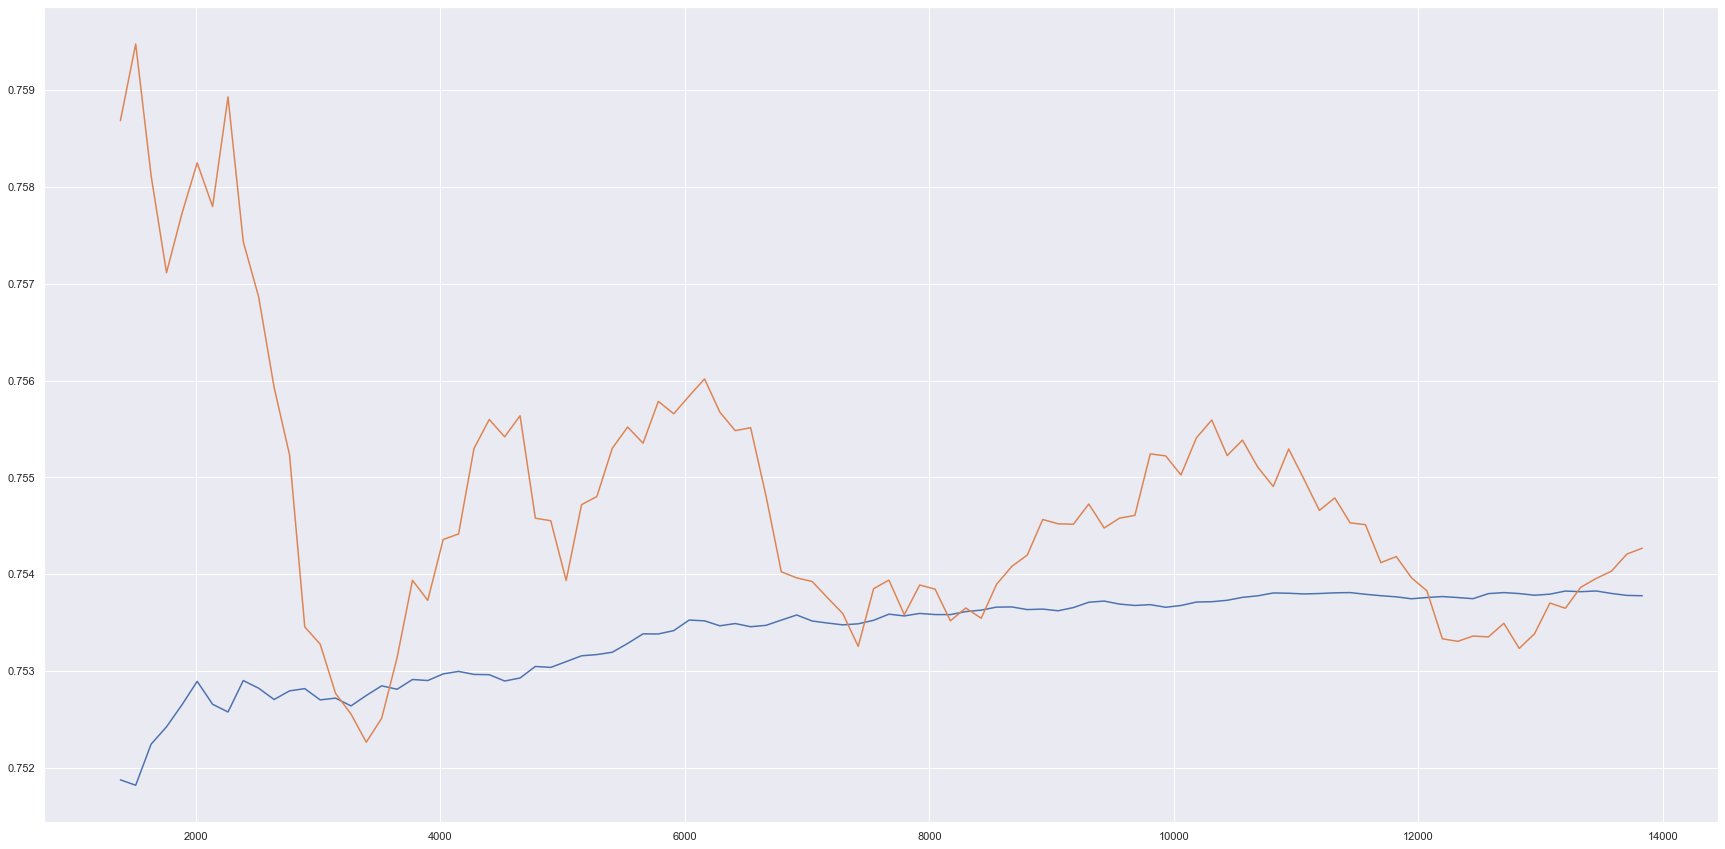

In [66]:
reg = LinearRegression().fit(X_train,y_train)

train_size, train_score, val_score = learning_curve(LinearRegression(), X_train, y_train,train_sizes=np.linspace(0.1,1,100), cv=5,
                                                    shuffle=True, scoring="r2")
plt.plot(train_size, val_score.mean(axis=1), label="Validation")
plt.plot(train_size, train_score.mean(axis=1), label="train")
print(reg.score(X_test,y_test))

0.7668390059058059


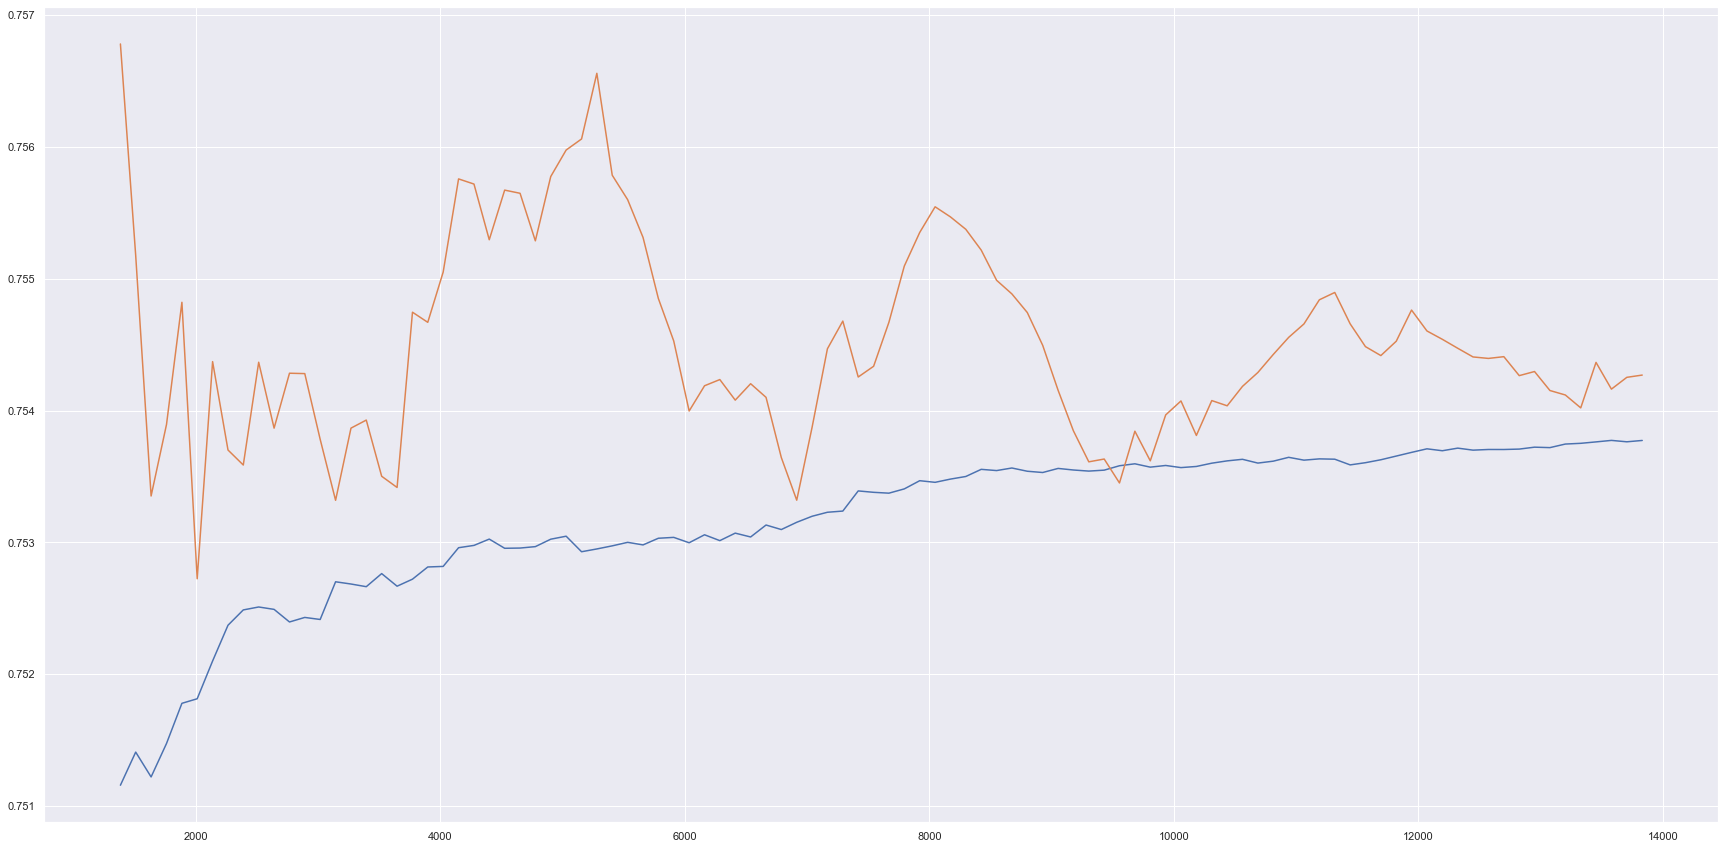

In [67]:
reg = Ridge(alpha=11).fit(X_train,y_train)

train_size, train_score, val_score = learning_curve(Ridge(alpha=1), X_train, y_train,train_sizes=np.linspace(0.1,1,100), cv=5,
                                                    shuffle=True, scoring='r2')
plt.plot(train_size, val_score.mean(axis=1), label="Validation")
plt.plot(train_size, train_score.mean(axis=1), label="train")

print(reg.score(X_test,y_test))

0.7669397250507368


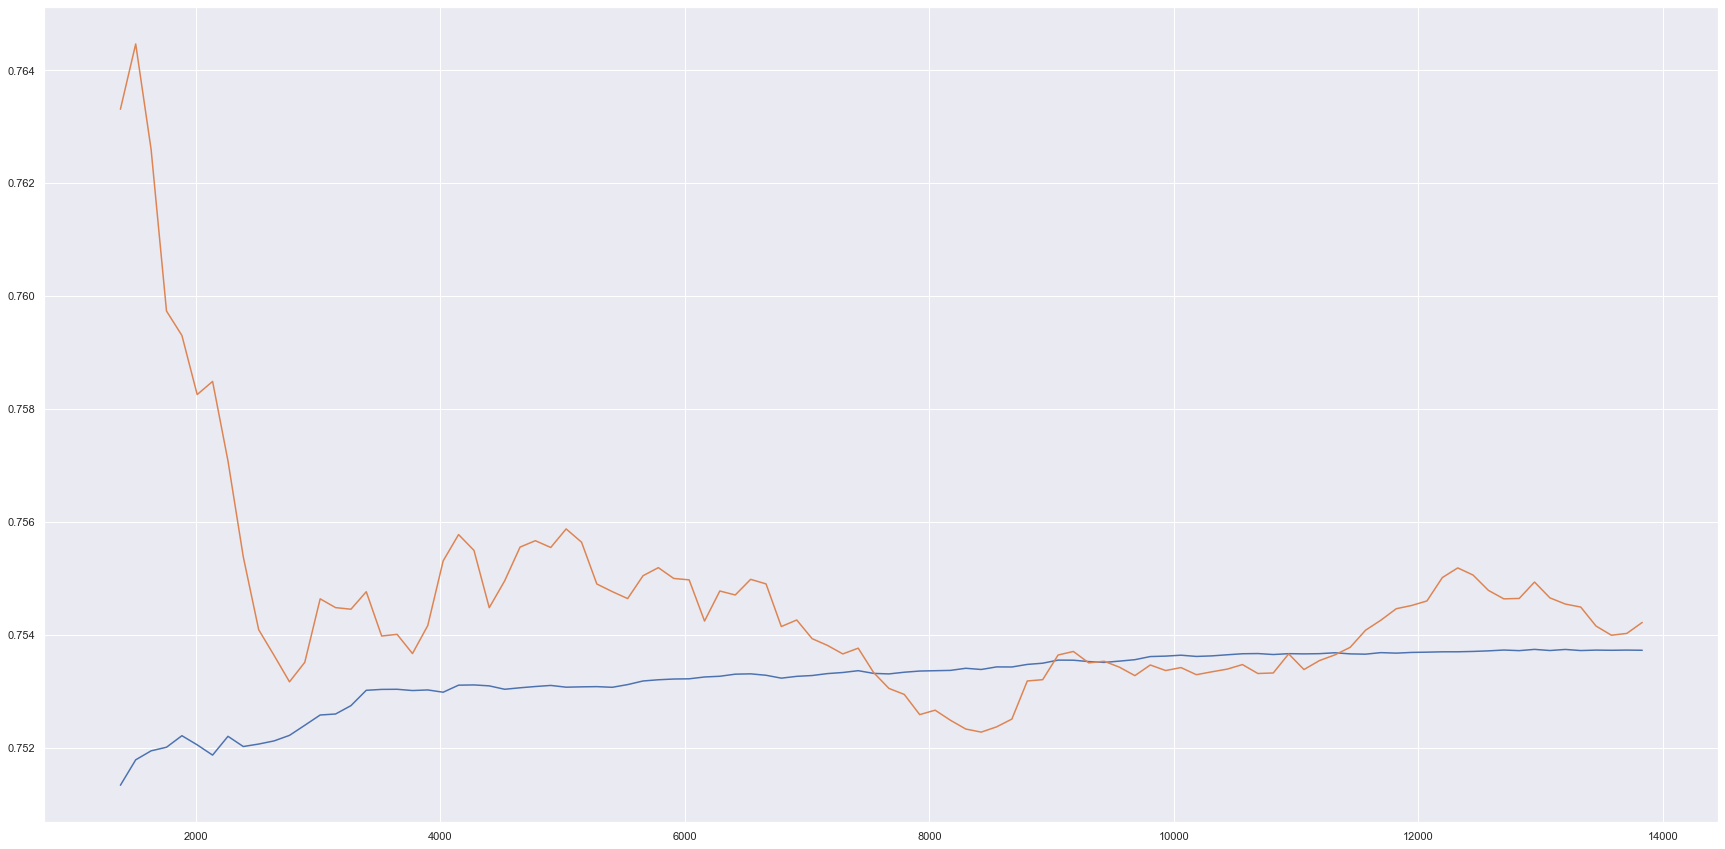

In [68]:
reg = Lasso(alpha=0.00025).fit(X_train,y_train)

train_size, train_score, val_score = learning_curve(Lasso(alpha=0.00025), X_train, y_train,train_sizes=np.linspace(0.1,1,100), cv=5,
                                                    shuffle=True, scoring='r2')
plt.plot(train_size, val_score.mean(axis=1), label="Validation")
plt.plot(train_size, train_score.mean(axis=1), label="train")
print(reg.score(X_test,y_test))